# Brain Tumor Classifier

#### What is a brain tumor?
A brain tumor is a collection, or mass, of abnormal cells in your brain. Your skull, which encloses your brain, is very rigid. Any growth inside such a restricted space can cause problems. Brain tumors can be cancerous (malignant) or noncancerous (benign). When benign or malignant tumors grow, they can cause the pressure inside your skull to increase. This can cause brain damage, and it can be life-threatening.

#### The importance of the subject
Early detection and classification of brain tumors is an important research domain in the field of medical imaging and accordingly helps in selecting the most convenient treatment method to save patients life therefore

#### Methods
The application of deep learning approaches in context to improve health diagnosis is providing impactful solutions. According to the World Health Organization (WHO), proper brain tumor diagnosis involves detection, brain tumor location identification, and classification of the tumor on the basis of malignancy, grade, and type. This experimental work in the diagnosis of brain tumors using Magnetic Resonance Imaging (MRI) involves detecting the tumor, classifying the tumor in terms of grade, type, and identification of tumor location. This method has experimented in terms of utilizing one model for classifying brain MRI on different classification tasks rather than an individual model for each classification task. The Convolutional Neural Network (CNN) based multi-task classification is equipped for the classification and detection of tumors. The identification of brain tumor location is also done using a CNN-based model by segmenting the brain tumor.


### The Objective:
We are gonna use Convolution Neural Network to predict the type of a brain tumor base on x rays pictures.

The dataset with the data is here: 
https://www.kaggle.com/masoudnickparvar/brain-tumor-mri-dataset



In [1]:
# Necessary imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Let's visualize the data.

In [2]:
data_dir = ('/content/drive/MyDrive/Brain_tumor/archive/Training/')
categories = ['glioma', 'meningioma', 'notumor', 'pituitary']
for i in categories:
    path = os.path.join(data_dir, i)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img)) 

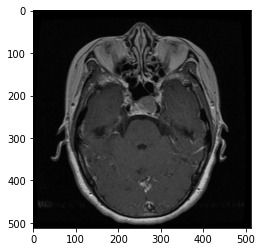

In [3]:
plt.imshow(img_array);

In [4]:
# The image shape.
img_array.shape

(512, 512, 3)

#### Ploting a image of each brain tumor type

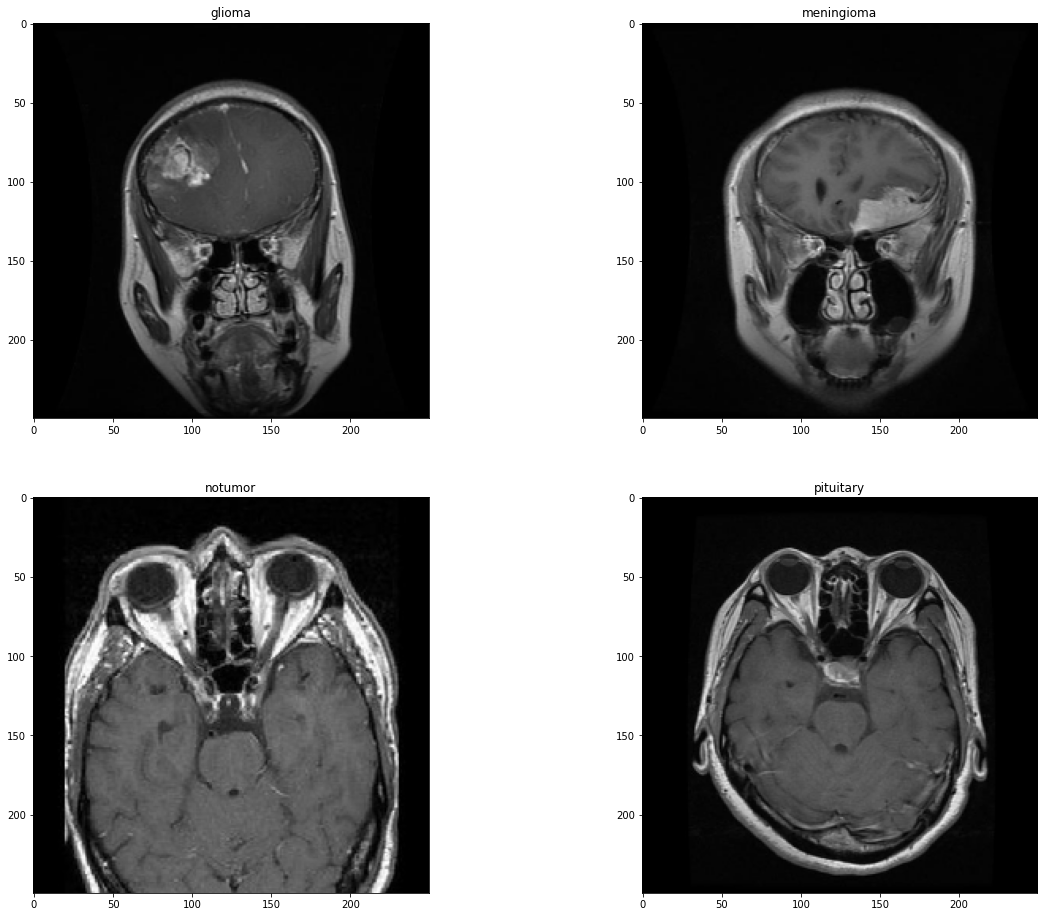

In [5]:
plt.figure(figsize=(20, 16))

images_path = ['/glioma/Tr-glTr_0000.jpg', '/meningioma/Tr-meTr_0000.jpg', '/notumor/Tr-noTr_0000.jpg', '/pituitary/Tr-piTr_0000.jpg']

for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    img = cv2.imread(data_dir + images_path[i])
    img = cv2.resize(img, (250, 250))
    plt.imshow(img)
    plt.title(categories[i])

# Modelling


# CNN - Model 1

In [6]:
# 96.95%

model1 = Sequential()

# Convolutional layer 1
model1.add(Conv2D(32,(3,3), input_shape=(64, 64, 1), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 2
model1.add(Conv2D(32,(3,3), activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(pool_size=(2,2)))



model1.add(Flatten())

# Neural network

model1.add(Dense(units= 252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=252, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(units=4, activation='softmax'))



model1.summary()





2022-12-19 20:27:04.931829: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 20:27:05.050020: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 20:27:05.050816: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-19 20:27:05.052670: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model1.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

# using the ImageDataGenerator to prepare the images (Resize, nomalize, etc)

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False) 

generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


# Creating the train and test data.

train = generator_train.flow_from_directory('/content/drive/MyDrive/Brain_tumor/archive/Training/', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('/content/drive/MyDrive/Brain_tumor/archive/Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')


Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### Trainig model 1

In [8]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model1_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model1_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model1_mcp = ModelCheckpoint(filepath = 'model1_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

# Fiting the model.
history1 = model1.fit(train, steps_per_epoch=5712//32, epochs=10, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model1_es, model1_rlr, model1_mcp])

2022-12-19 20:27:09.662569: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10


2022-12-19 20:27:12.074964: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


178/178 [==============================] - 30s 122ms/step - loss: 0.8143 - categorical_accuracy: 0.7301 - val_loss: 6.9086 - val_categorical_accuracy: 0.2266

Epoch 00001: val_categorical_accuracy improved from -inf to 0.22656, saving model to model1_weights.h5
Epoch 2/10
178/178 [==============================] - 18s 101ms/step - loss: 0.4515 - categorical_accuracy: 0.8280 - val_loss: 3.5150 - val_categorical_accuracy: 0.3773

Epoch 00002: val_categorical_accuracy improved from 0.22656 to 0.37734, saving model to model1_weights.h5
Epoch 3/10
178/178 [==============================] - 19s 105ms/step - loss: 0.3514 - categorical_accuracy: 0.8644 - val_loss: 1.0504 - val_categorical_accuracy: 0.7016

Epoch 00003: val_categorical_accuracy improved from 0.37734 to 0.70156, saving model to model1_weights.h5
Epoch 4/10
178/178 [==============================] - 19s 105ms/step - loss: 0.2560 - categorical_accuracy: 0.9056 - val_loss: 0.3324 - val_categorical_accuracy: 0.8664

Epoch 00004: val

In [9]:
model1.evaluate(test)

41/41 [==============================] - 3s 69ms/step - loss: 0.1486 - categorical_accuracy: 0.9474


[0.14856672286987305, 0.9473684430122375]

In [10]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 62, 62, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 29, 29, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0

# Model 2

In [11]:

model2 = Sequential()

# Convolutional layer 1
model2.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model2.add(Conv2D(128,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model2.add(Conv2D(256,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model2.add(Conv2D(512,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(pool_size=(2,2)))


model2.add(Flatten())

# Full connect layers

model2.add(Dense(units= 512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model2.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 64)        3200      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       401536    
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)      

In [12]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('../input/brain-tumor-mri-dataset/Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('../input/brain-tumor-mri-dataset/Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')





Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


### Training model 2

In [13]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model2_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model2_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model2_mcp = ModelCheckpoint(filepath = 'model2_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)


# Fiting the model.
history2 = model2.fit(train, steps_per_epoch=5712//32, epochs=5, validation_data=test, validation_steps= 1311//32,
                      callbacks=[model2_es, model2_rlr, model2_mcp])

Epoch 1/5
178/178 [==============================] - 21s 111ms/step - loss: 1.4379 - categorical_accuracy: 0.6199 - val_loss: 5.0355 - val_categorical_accuracy: 0.2297

Epoch 00001: val_categorical_accuracy improved from -inf to 0.22969, saving model to model2_weights.h5
Epoch 2/5
178/178 [==============================] - 20s 111ms/step - loss: 0.7211 - categorical_accuracy: 0.7336 - val_loss: 1.4785 - val_categorical_accuracy: 0.4539

Epoch 00002: val_categorical_accuracy improved from 0.22969 to 0.45391, saving model to model2_weights.h5
Epoch 3/5
178/178 [==============================] - 19s 109ms/step - loss: 0.5694 - categorical_accuracy: 0.7806 - val_loss: 0.9776 - val_categorical_accuracy: 0.6422

Epoch 00003: val_categorical_accuracy improved from 0.45391 to 0.64219, saving model to model2_weights.h5
Epoch 4/5
178/178 [==============================] - 20s 110ms/step - loss: 0.4369 - categorical_accuracy: 0.8305 - val_loss: 0.8017 - val_categorical_accuracy: 0.6633

Epoch 000

In [14]:
model2.evaluate(test)

41/41 [==============================] - 3s 82ms/step - loss: 3.9751 - categorical_accuracy: 0.3532


[3.9751029014587402, 0.35316553711891174]

In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 64)        3200      
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 128)       401536    
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 32, 128)       512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 256)      

# Model 3

In [16]:
model3 = Sequential()

# Convolutional layer 1
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model3.add(Conv2D(64,(7,7), input_shape=(64, 64, 1), padding='same', activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(pool_size=(2,2)))


model3.add(Flatten())

# Full connect layers

model3.add(Dense(units= 512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=512, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(units=4, activation='softmax'))


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, decay=0.0001, clipvalue=0.5)
model3.compile(optimizer=optimizer, loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])


In [17]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('/content/drive/MyDrive/Brain_tumor/archive/Training', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('/content/drive/MyDrive/Brain_tumor/archive/Testing', target_size=(64,64),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [18]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model3_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model3_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)

# Automatically saves the best weights of the model, based on best val_accuracy
model3_mcp = ModelCheckpoint(filepath = 'model3_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

# Fitting the model
history3 = model3.fit(train, steps_per_epoch=5712//32, epochs=100, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model3_es, model3_rlr, model3_mcp])

Epoch 1/100
178/178 [==============================] - 20s 107ms/step - loss: 0.8857 - categorical_accuracy: 0.7129 - val_loss: 2.8089 - val_categorical_accuracy: 0.3102

Epoch 00001: val_categorical_accuracy improved from -inf to 0.31016, saving model to model3_weights.h5
Epoch 2/100
178/178 [==============================] - 19s 107ms/step - loss: 0.5262 - categorical_accuracy: 0.8019 - val_loss: 1.7157 - val_categorical_accuracy: 0.4430

Epoch 00002: val_categorical_accuracy improved from 0.31016 to 0.44297, saving model to model3_weights.h5
Epoch 3/100
178/178 [==============================] - 19s 107ms/step - loss: 0.4107 - categorical_accuracy: 0.8368 - val_loss: 1.0361 - val_categorical_accuracy: 0.7344

Epoch 00003: val_categorical_accuracy improved from 0.44297 to 0.73438, saving model to model3_weights.h5
Epoch 4/100
178/178 [==============================] - 19s 107ms/step - loss: 0.3015 - categorical_accuracy: 0.8849 - val_loss: 0.3663 - val_categorical_accuracy: 0.8484

E

In [19]:
model3.evaluate(test)

41/41 [==============================] - 3s 77ms/step - loss: 0.0530 - categorical_accuracy: 0.9908


[0.05297029763460159, 0.9908466935157776]

# Evaluating models 1, 2 and 3


Text(0.5, 1.0, 'Accuracy on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

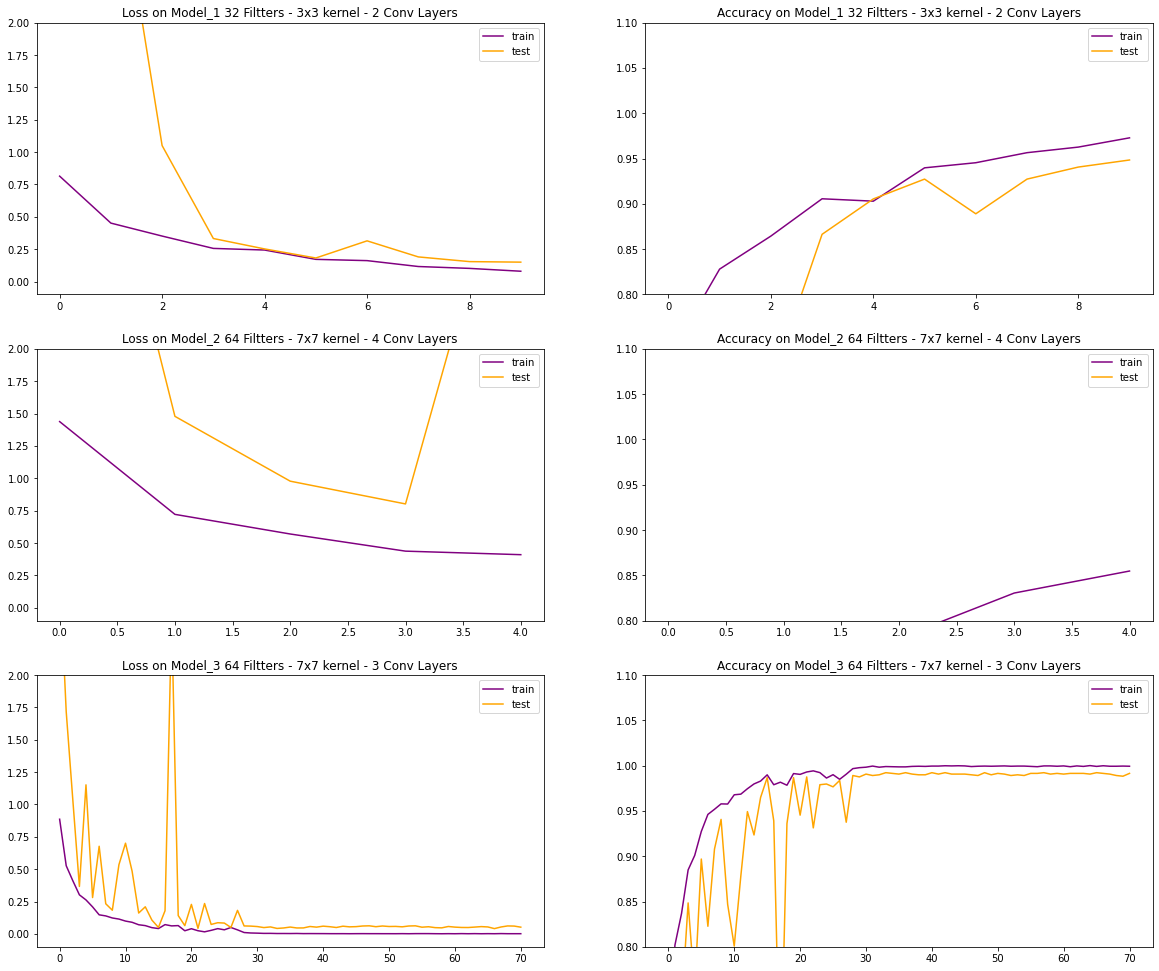

In [20]:
# Code for plotting
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(20,17))

axs[0, 0].plot(history1.history["loss"],c = "purple")
axs[0, 0].plot(history1.history["val_loss"],c = "orange")
axs[0, 0].set_ylim([-0.1,2])
axs[0, 0].legend(["train", "test"])
axs[0, 0].set_title('Loss on Model_1 32 Filtters - 3x3 kernel - 2 Conv Layers')

axs[0, 1].plot(history1.history["categorical_accuracy"],c = "purple")
axs[0, 1].plot(history1.history["val_categorical_accuracy"],c = "orange")
axs[0, 1].set_ylim([0.8,1.1])
axs[0, 1].legend(["train", "test"])
axs[0, 1].set_title('Accuracy on Model_1 32 Filtters - 3x3 kernel - 2 Conv Layers')

axs[1, 0].plot(history2.history["loss"],c = "purple")
axs[1, 0].plot(history2.history["val_loss"],c = "orange")
axs[1, 0].set_ylim([-0.1,2])
axs[1, 0].legend(["train", "test"])
axs[1, 0].set_title('Loss on Model_2 64 Filtters - 7x7 kernel - 4 Conv Layers')

axs[1, 1].plot(history2.history["categorical_accuracy"],c = "purple")
axs[1, 1].plot(history2.history["val_categorical_accuracy"],c = "orange")
axs[1, 1].set_ylim([0.8,1.1])
axs[1, 1].legend(["train", "test"])
axs[1, 1].set_title('Accuracy on Model_2 64 Filtters - 7x7 kernel - 4 Conv Layers')

axs[2, 0].plot(history3.history["loss"],c = "purple")
axs[2, 0].plot(history3.history["val_loss"],c = "orange")
axs[2, 0].set_ylim([-0.1,2])
axs[2, 0].legend(["train", "test"])
axs[2, 0].set_title('Loss on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

axs[2, 1].plot(history3.history["categorical_accuracy"],c = "purple")
axs[2, 1].plot(history3.history["val_categorical_accuracy"],c = "orange")
axs[2, 1].set_ylim([0.8,1.1])
axs[2, 1].legend(["train", "test"])
axs[2, 1].set_title('Accuracy on Model_3 64 Filtters - 7x7 kernel - 3 Conv Layers')

In [21]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 64, 64, 64)        3200      
_________________________________________________________________
batch_normalization_6 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 64)        200768    
_________________________________________________________________
batch_normalization_7 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 64)       

In [22]:
model3.evaluate(test)

41/41 [==============================] - 3s 75ms/step - loss: 0.0595 - categorical_accuracy: 0.9901


[0.05949071794748306, 0.9900839328765869]

# Making changes on new models
I will change the number of Conv layers, FC layers, optmizer and input_shape.

## Model 4

In [23]:
model4 = Sequential()

# Convolutional layer 1
model4.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model4.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model4.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model4.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model4.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model4.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model4.add(BatchNormalization())
model4.add(MaxPooling2D(pool_size=(2,2)))

model4.add(Flatten())

# Full connect layers

model4.add(Dense(units= 1024, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(units=1024, activation='relu'))
model4.add(Dropout(0.3))
model4.add(Dense(units=4, activation='softmax'))



model4.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [24]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)



train = generator_train.flow_from_directory('/content/drive/MyDrive/Brain_tumor/archive/Training', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('/content/drive/MyDrive/Brain_tumor/archive/Testing', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [25]:
# Creating callbacks for the model.
# If the model dosen't continue to improve (loss), the trainning will stop.

# Stop training if loss doesn't keep decreasing.
model4_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model4_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)


# Automatically saves the best weights of the model, based on best val_accuracy
model4_mcp = ModelCheckpoint(filepath = 'model4_weights.h5', monitor = 'val_accuracy_score', 
                      save_best_only = True, verbose = 1)

history4 = model4.fit(train, steps_per_epoch=5712//32, epochs=100, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model4_es, model4_rlr, model4_mcp])

Epoch 1/100
178/178 [==============================] - 28s 140ms/step - loss: 0.7230 - categorical_accuracy: 0.7317 - val_loss: 1.5078 - val_categorical_accuracy: 0.3070
Epoch 2/100
178/178 [==============================] - 26s 146ms/step - loss: 0.4320 - categorical_accuracy: 0.8375 - val_loss: 1.5121 - val_categorical_accuracy: 0.3281
Epoch 3/100
178/178 [==============================] - 24s 137ms/step - loss: 0.3333 - categorical_accuracy: 0.8722 - val_loss: 0.6355 - val_categorical_accuracy: 0.7516
Epoch 4/100
178/178 [==============================] - 26s 145ms/step - loss: 0.2615 - categorical_accuracy: 0.9033 - val_loss: 0.3648 - val_categorical_accuracy: 0.8609
Epoch 5/100
178/178 [==============================] - 24s 133ms/step - loss: 0.2202 - categorical_accuracy: 0.9190 - val_loss: 0.4152 - val_categorical_accuracy: 0.8227
Epoch 6/100
178/178 [==============================] - 26s 147ms/step - loss: 0.1777 - categorical_accuracy: 0.9377 - val_loss: 0.2027 - val_categoric

In [26]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 200, 200, 64)      3200      
_________________________________________________________________
batch_normalization_9 (Batch (None, 200, 200, 64)      256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 100, 100, 128)     401536    
_________________________________________________________________
batch_normalization_10 (Batc (None, 100, 100, 128)     512       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 50, 50, 128)      

In [27]:
model4.evaluate(test)

41/41 [==============================] - 5s 117ms/step - loss: 0.0639 - categorical_accuracy: 0.9863


[0.06393475830554962, 0.986270010471344]

## Model 5

In [28]:
model5 = Sequential()

# Convolutional layer 1
model5.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model5.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model5.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model5.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model5.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model5.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))

model5.add(Flatten())

# Full connect layers

model5.add(Dense(units= 1024, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(units=512, activation='relu'))
model5.add(Dropout(0.25))
model5.add(Dense(units=4, activation='softmax'))



model5.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [29]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)



train = generator_train.flow_from_directory('/content/drive/MyDrive/Brain_tumor/archive/Training', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('/content/drive/MyDrive/Brain_tumor/archive/Testing', target_size=(200, 200),
                                              batch_size=32, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [30]:
model5_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model5_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model5_mcp = ModelCheckpoint(filepath = 'model5_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)

history5 = model5.fit(train, steps_per_epoch=5712//32, epochs=100, validation_data=test, validation_steps= 1311//32,
                     callbacks=[model5_es, model5_rlr, model5_mcp])

Epoch 1/100
178/178 [==============================] - 24s 134ms/step - loss: 0.7015 - categorical_accuracy: 0.7458 - val_loss: 1.7292 - val_categorical_accuracy: 0.2297

Epoch 00001: val_categorical_accuracy improved from -inf to 0.22969, saving model to model5_weights.h5
Epoch 2/100
178/178 [==============================] - 24s 132ms/step - loss: 0.4140 - categorical_accuracy: 0.8419 - val_loss: 1.6108 - val_categorical_accuracy: 0.3125

Epoch 00002: val_categorical_accuracy improved from 0.22969 to 0.31250, saving model to model5_weights.h5
Epoch 3/100
178/178 [==============================] - 27s 152ms/step - loss: 0.3027 - categorical_accuracy: 0.8857 - val_loss: 0.8357 - val_categorical_accuracy: 0.6398

Epoch 00003: val_categorical_accuracy improved from 0.31250 to 0.63984, saving model to model5_weights.h5
Epoch 4/100
178/178 [==============================] - 24s 133ms/step - loss: 0.2425 - categorical_accuracy: 0.9085 - val_loss: 0.3096 - val_categorical_accuracy: 0.8820

E

In [31]:
model5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 200, 200, 64)      3200      
_________________________________________________________________
batch_normalization_15 (Batc (None, 200, 200, 64)      256       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 100, 100, 128)     401536    
_________________________________________________________________
batch_normalization_16 (Batc (None, 100, 100, 128)     512       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 50, 50, 128)      

In [32]:
model5.evaluate(test)

41/41 [==============================] - 3s 81ms/step - loss: 0.0520 - categorical_accuracy: 0.9878


[0.05203110724687576, 0.9877955913543701]

## Model 6

In [33]:
model6 = Sequential()

# Convolutional layer 1
model6.add(Conv2D(64,(7,7), input_shape=(200, 200, 1), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

#Convolutional layer 2
model6.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 3
model6.add(Conv2D(128,(7,7), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 4
model6.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

 # Convolutional layer 5
model6.add(Conv2D(256,(7,7), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional layer 6
model6.add(Conv2D(512,(7,7), padding='same', activation='relu'))
model6.add(BatchNormalization())
model6.add(MaxPooling2D(pool_size=(2,2)))

model6.add(Flatten())

# Full connect layers

model6.add(Dense(units= 1024, activation='relu'))
model6.add(Dropout(0.25))
model6.add(Dense(units=1024, activation='relu'))
model6.add(Dropout(0.25))
model6.add(Dense(units=512, activation='relu'))
model6.add(Dropout(0.2))
model6.add(Dense(units=4, activation='softmax'))



model6.compile(optimizer=SGD(learning_rate=0.001), loss='categorical_crossentropy',
                   metrics= ['categorical_accuracy'])

In [34]:
# using the ImageDataGenerator

generator_train = ImageDataGenerator(rescale=1./255,
                                    featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)

generator_test = ImageDataGenerator(rescale=1./255,
                                   featurewise_center=False,
                                    samplewise_center=False,
                                    featurewise_std_normalization=False,
                                    samplewise_std_normalization=False,
                                    zca_whitening=False,
                                    rotation_range=0,
                                    zoom_range = 0,
                                    width_shift_range=0,
                                    height_shift_range=0,
                                    horizontal_flip=True,
                                    vertical_flip=False)


train = generator_train.flow_from_directory('/content/drive/MyDrive/Brain_tumor/archive/Training', target_size=(200, 200,),
                                              batch_size=64, class_mode= "categorical", color_mode='grayscale')

test = generator_test.flow_from_directory('/content/drive/MyDrive/Brain_tumor/archive/Testing', target_size=(200, 200,),
                                              batch_size=64, class_mode= "categorical", color_mode='grayscale')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [35]:
model6_es = EarlyStopping(monitor = 'loss', min_delta = 1e-11, patience = 12, verbose = 1)
model6_rlr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 6, verbose = 1)
model6_mcp = ModelCheckpoint(filepath = 'model6_weights.h5', monitor = 'val_categorical_accuracy', 
                      save_best_only = True, verbose = 1)


history6 = model6.fit(train, steps_per_epoch=5712//64, epochs=100, validation_data=test, validation_steps= 1311//64,
                     callbacks=[model6_es, model6_rlr, model6_mcp])

Epoch 1/100
89/89 [==============================] - 27s 258ms/step - loss: 0.8073 - categorical_accuracy: 0.6808 - val_loss: 1.3807 - val_categorical_accuracy: 0.2133

Epoch 00001: val_categorical_accuracy improved from -inf to 0.21328, saving model to model6_weights.h5
Epoch 2/100
89/89 [==============================] - 23s 261ms/step - loss: 0.5243 - categorical_accuracy: 0.8033 - val_loss: 1.4299 - val_categorical_accuracy: 0.2305

Epoch 00002: val_categorical_accuracy improved from 0.21328 to 0.23047, saving model to model6_weights.h5
Epoch 3/100
89/89 [==============================] - 22s 250ms/step - loss: 0.4286 - categorical_accuracy: 0.8362 - val_loss: 1.4570 - val_categorical_accuracy: 0.2250

Epoch 00003: val_categorical_accuracy did not improve from 0.23047
Epoch 4/100
89/89 [==============================] - 27s 298ms/step - loss: 0.3706 - categorical_accuracy: 0.8600 - val_loss: 1.4584 - val_categorical_accuracy: 0.3375

Epoch 00004: val_categorical_accuracy improved f

In [36]:
model6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 200, 200, 64)      3200      
_________________________________________________________________
batch_normalization_21 (Batc (None, 200, 200, 64)      256       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 100, 100, 64)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 100, 100, 128)     401536    
_________________________________________________________________
batch_normalization_22 (Batc (None, 100, 100, 128)     512       
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 50, 50, 128)       0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 50, 50, 128)      

In [37]:
model6.evaluate(test)

21/21 [==============================] - 4s 165ms/step - loss: 0.0746 - categorical_accuracy: 0.9817


[0.07459783554077148, 0.9816933870315552]

## Evaluating models 4, 5 and 6

Text(0.5, 1.0, 'Accuracy on Model_6 64 Filtters - 7x7 kernel - 6 Conv Layers, 3 FC and Batch 64')

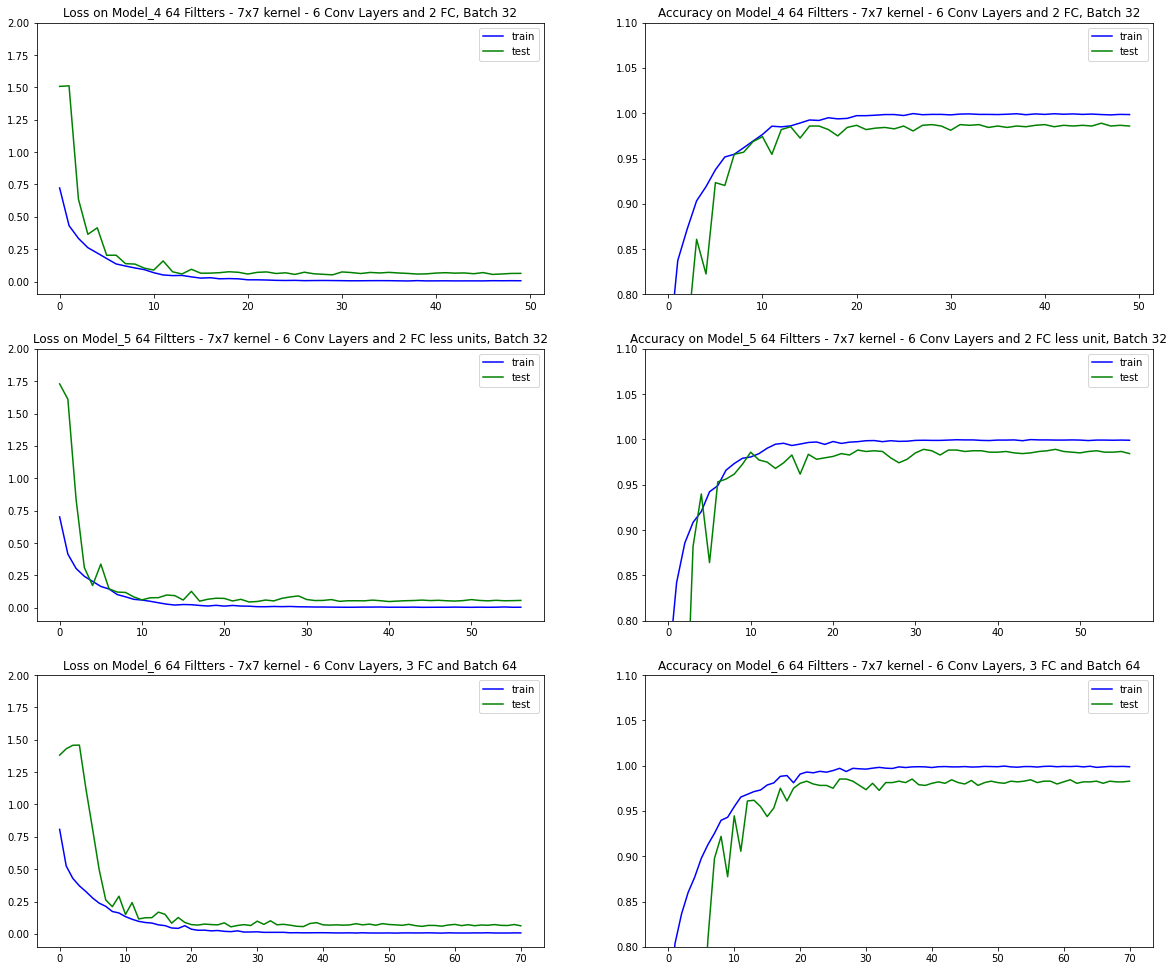

In [38]:
# Code for plotting
import matplotlib.pyplot as plt
fig, axs = plt.subplots(3, 2, figsize=(20,17))

axs[0, 0].plot(history4.history["loss"],c = "blue")
axs[0, 0].plot(history4.history["val_loss"],c = "green")
axs[0, 0].set_ylim([-0.1,2])
axs[0, 0].legend(["train", "test"])
axs[0, 0].set_title('Loss on Model_4 64 Filtters - 7x7 kernel - 6 Conv Layers and 2 FC, Batch 32')

axs[0, 1].plot(history4.history["categorical_accuracy"],c = "blue")
axs[0, 1].plot(history4.history["val_categorical_accuracy"],c = "green")
axs[0, 1].set_ylim([0.8,1.1])
axs[0, 1].legend(["train", "test"])
axs[0, 1].set_title('Accuracy on Model_4 64 Filtters - 7x7 kernel - 6 Conv Layers and 2 FC, Batch 32')

axs[1, 0].plot(history5.history["loss"],c = "blue")
axs[1, 0].plot(history5.history["val_loss"],c = "green")
axs[1, 0].set_ylim([-0.1,2])
axs[1, 0].legend(["train", "test"])
axs[1, 0].set_title('Loss on Model_5 64 Filtters - 7x7 kernel - 6 Conv Layers and 2 FC less units, Batch 32')

axs[1, 1].plot(history5.history["categorical_accuracy"],c = "blue")
axs[1, 1].plot(history5.history["val_categorical_accuracy"],c = "green")
axs[1, 1].set_ylim([0.8,1.1])
axs[1, 1].legend(["train", "test"])
axs[1, 1].set_title('Accuracy on Model_5 64 Filtters - 7x7 kernel - 6 Conv Layers and 2 FC less unit, Batch 32')

axs[2, 0].plot(history6.history["loss"],c = "blue")
axs[2, 0].plot(history6.history["val_loss"],c = "green")
axs[2, 0].set_ylim([-0.1,2])
axs[2, 0].legend(["train", "test"])
axs[2, 0].set_title('Loss on Model_6 64 Filtters - 7x7 kernel - 6 Conv Layers, 3 FC and Batch 64')

axs[2, 1].plot(history6.history["categorical_accuracy"],c = "blue")
axs[2, 1].plot(history6.history["val_categorical_accuracy"],c = "green")
axs[2, 1].set_ylim([0.8,1.1])
axs[2, 1].legend(["train", "test"])
axs[2, 1].set_title('Accuracy on Model_6 64 Filtters - 7x7 kernel - 6 Conv Layers, 3 FC and Batch 64')

# Conclusion:
Model 5 pleased me a lot.
Not too complex and not too simple either.
We avoid underfitting and overfitting with a smooth process.

I will save model 5 for now and I will continue to testing and working on this data.

In [39]:
# Saving the model
model5_json = model5.to_json()
with open('classifier_brain_tumor.json', 'w') as json_file:
    json_file.write(model5_json)
    
# Saving the best weights was already save on the training process through callback.
    
    
    